In [1]:
# windows only hack for graphviz path 
import os
for path in os.environ['PATH'].split(os.pathsep):
    if path.endswith("Library\\bin"):
        os.environ['PATH']+=os.pathsep+os.path.join(path, 'graphviz')

In [2]:
#os.environ['KERAS_BACKEND']='tensorflow'
os.environ['KERAS_BACKEND']='theano'
#os.environ['THEANO_FLAGS']='floatX=float32, device=cuda'

In [3]:
import keras
from keras.models import Sequential
from PIL import Image
import numpy as np

Using Theano backend.


In [4]:
import lzma
import pickle
with lzma.open("mnist.pkl.xz", 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
train_X, train_y = train_set
validation_X, validation_y = validation_set
test_X, test_y = test_set



#keras的one hot function
train_Y=keras.utils.to_categorical(train_y[:10],10)
validation_Y=keras.utils.to_categorical(validation_y[:10],10)
test_Y=keras.utils.to_categorical(test_Y[:10],10)

In [5]:

train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_Y = np.eye(10)[validation_y]

# or
# from keras.datasets import mnist
# from keras.utils import np_utils
# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# train_Y = np_utils.to_categorical(train_y, 10)
# test_Y = np_utils.to_categorical(test_y, 10)

### logistic regression

In [6]:
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(units=100, input_dim=784)) #units是輸出的維度, input_dim是輸入維度
model.add(Activation('relu'))
model.add(Dense(units=10, input_dim=100)) #units是輸出的維度, input_dim是輸入維度
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])



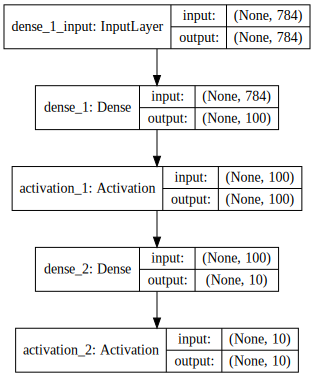

In [8]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model.fit(train_X, train_Y, validation_data=(validation_X, validation_Y), batch_size=128, epochs=3)

KeyboardInterrupt: 

In [ ]:
# 預測看看 test_X 前 20 筆
model.predict_classes(test_X[:20])

In [ ]:
# 對答案
test_y[:20]

In [ ]:
# 看看 test accuracy
model.evaluate(test_X, test_Y)

## Q 
* 將 `optimizer` 換成 `"adam"`
* 將 `optimizer` 換成 `keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)`

### 建立  convolutional model
我們之前的網路架構
* convolution 2d kernel=(3,3), filters=32
* relu
* max pool
* convolution 2d kernel=(3,3), filters=64 # 因為前一步做了pool, 所以這一步filters變兩倍補償回來
* relu
* max pool
* dense units=1024
* relu
* dropout (rate=0.8) # 先省略這一層
* dense units = 10
* softmax

試著架出這樣的網路

然後訓練看看

開頭幾行可以這樣寫
```python
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape
model = Sequential()
model.add(Reshape((28, 28, 1), input_shape=(784,) ))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
```

In [ ]:
# 參考答案
#%load q_keras_cnn.py

In [ ]:
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape
?Conv2D

In [ ]:
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape
#from keras.layers BatchNormalization
model = Sequential()
model.add(Reshape((28, 28, 1), input_shape=(784,) )) # 1代表一個圖層 or 一整張圖片
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(activation="relu")
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu"))
model.add(MaxPool2D())
model.add(Reshape((-1,))) #把矩陣拉直, 也可以用flaten
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))


In [ ]:
model.fit(train_X, train_Y, validation_data=(validation_X, validation_Y), batch_size=128, epochs=3)
rtn = model.evaluate(test_X, test_Y)
print("\ntest accuracy=", rtn[1])

In [ ]:
# 預測看看 test_X 前 20 筆
model.predict_classes(test_X[:20])


In [ ]:
# 對答案
test_y[:20]

In [ ]:
# 看看 test accuracy
model.evaluate(test_X, test_Y)